In this notebook we will apply `TableAutomization.py` file to six modal distribution.

### Importing the needed libraries 

In [1]:
from cuqi.distribution import DistributionGallery, Gaussian, JointDistribution
from cuqi.testproblem import Poisson1D
from cuqi.problem import BayesianProblem
import cuqi
import inspect
import numpy as np
import matplotlib.pyplot as plt
from cuqi.sampler import MH, CWMH, ULA, MALA, NUTS
import time
import scipy.stats as sps
from scipy.stats import gaussian_kde
import pandas as pd
import cProfile, pstats, io
from pstats import SortKey
import os
import matplotlib.pyplot as plt
from IPython.display import Image, display
import sys
import math
sys.path.append(os.path.abspath('..'))
from utilities import TableAutomization as TA
import benchmarksClass as BC 


# The multi modal distribution


The given probability density function is:

$\pi(x,y) \propto \exp\left(-\frac{x^2}{2}\right) \exp\left(\frac{-(\csc^5(y) - x)^2}{2}\right) \quad (-10< x,y < 10)$

 Gradient of the log-pdf


$\nabla \log \pi(x, y) = \left(\csc^5(y) - 2x, \; 5 (\csc^5(y) - x) \csc^5(y) \cot(y)\right)$

In [2]:

target_multimodal =BC.Sixmodal()

### Plotting the "multimodal"

/app/CUQIpy-Benchmarks/benchmarksClass/_sixmodal.py:13: RuntimeWarning: divide by zero encountered in power
  return (- x[:,0]**2 - ((np.sin(x[:, 1]))**(-5) - x[:, 0])**2)/2


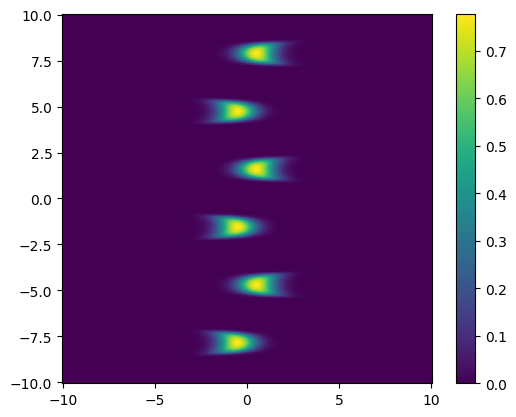

In [3]:
TA.plot_pdf_2D(target_multimodal, -10, 10, -10, 10,N2=201)

## Example 



In this example, we used smaller sample size for NUTS to reduce the comuptational cost and scales are tuned for each method: 


- Compute sampling methods

In [24]:
true_mu = np.array([0, 0])
true_sigma = np.array([1,1])
y = cuqi.distribution.Gaussian(mean=true_mu, cov=true_sigma**2)

In [29]:
df, (fig, axs) = TA.create_comparison(target_multimodal, scale = [1,1,1,1,0.05], Ns = [8500,8500,8500,8500,850], Nb = [1500,1500,1500,1500,150], x0 = np.array([1,2]), seed = 12,chains=1,selected_criteria= ["ESS", "AR", "LogPDF", "Gradient","Rhat"], selected_methods =["MH_fixed", "CWMH", "ULA", "MALA", "NUTS"])

Sample 10000 / 10000

Average acceptance rate: 0.24964705882352942 

Sample 10000 / 10000

Average acceptance rate all components: 0.48911764705882355 

Sample 10000 / 10000
Sample 10000 / 10000
Sample 1000 / 1000


/var/folders/br/kqx4wrcd4yn6zmk5jlrz9r7c0000gn/T/ipykernel_51489/1533858947.py:1: RuntimeWarning: divide by zero encountered in scalar power
  logpdf = lambda x:  (- x[0]**2 - ((np.sin(x[1]))**(-5) - x[0])**2)/2 if -10 <= x[0] <= 10 and -10 <= x[1] <= 10 else float('-inf')


- Print table

In [30]:
TA.print_table(df)

+----------+---------+----------+-------+----------+---------+-------+----------+----------+
|  Method  | Samples | Burn-ins | Scale | ESS(v0)  | ESS(v1) |   AR  |  LogPDF  | Gradient |
+----------+---------+----------+-------+----------+---------+-------+----------+----------+
| MH_fixed |   8500  |   1500   |  1.0  |  84.698  |   7.0   |  0.25 |  10000   |    0     |
|   CWMH   |   8500  |   1500   |  1.0  | 106.154  |  9.005  | 0.609 |  19999   |    0     |
|   ULA    |   8500  |   1500   |  1.0  | 8089.607 |  4.947  |  1.0  |  10000   |  10000   |
|   MALA   |   8500  |   1500   |  1.0  |  86.18   |  4.659  | 0.233 |  10000   |  10000   |
|   NUTS   |   850   |   150    |   -   |  49.12   |  90.507 |  1.0  | 57837660 | 57837660 |
+----------+---------+----------+-------+----------+---------+-------+----------+----------+


Observations:
- NUTS takes so much time for computation.
- MH sampler is performing well.

#### Create distribution images  

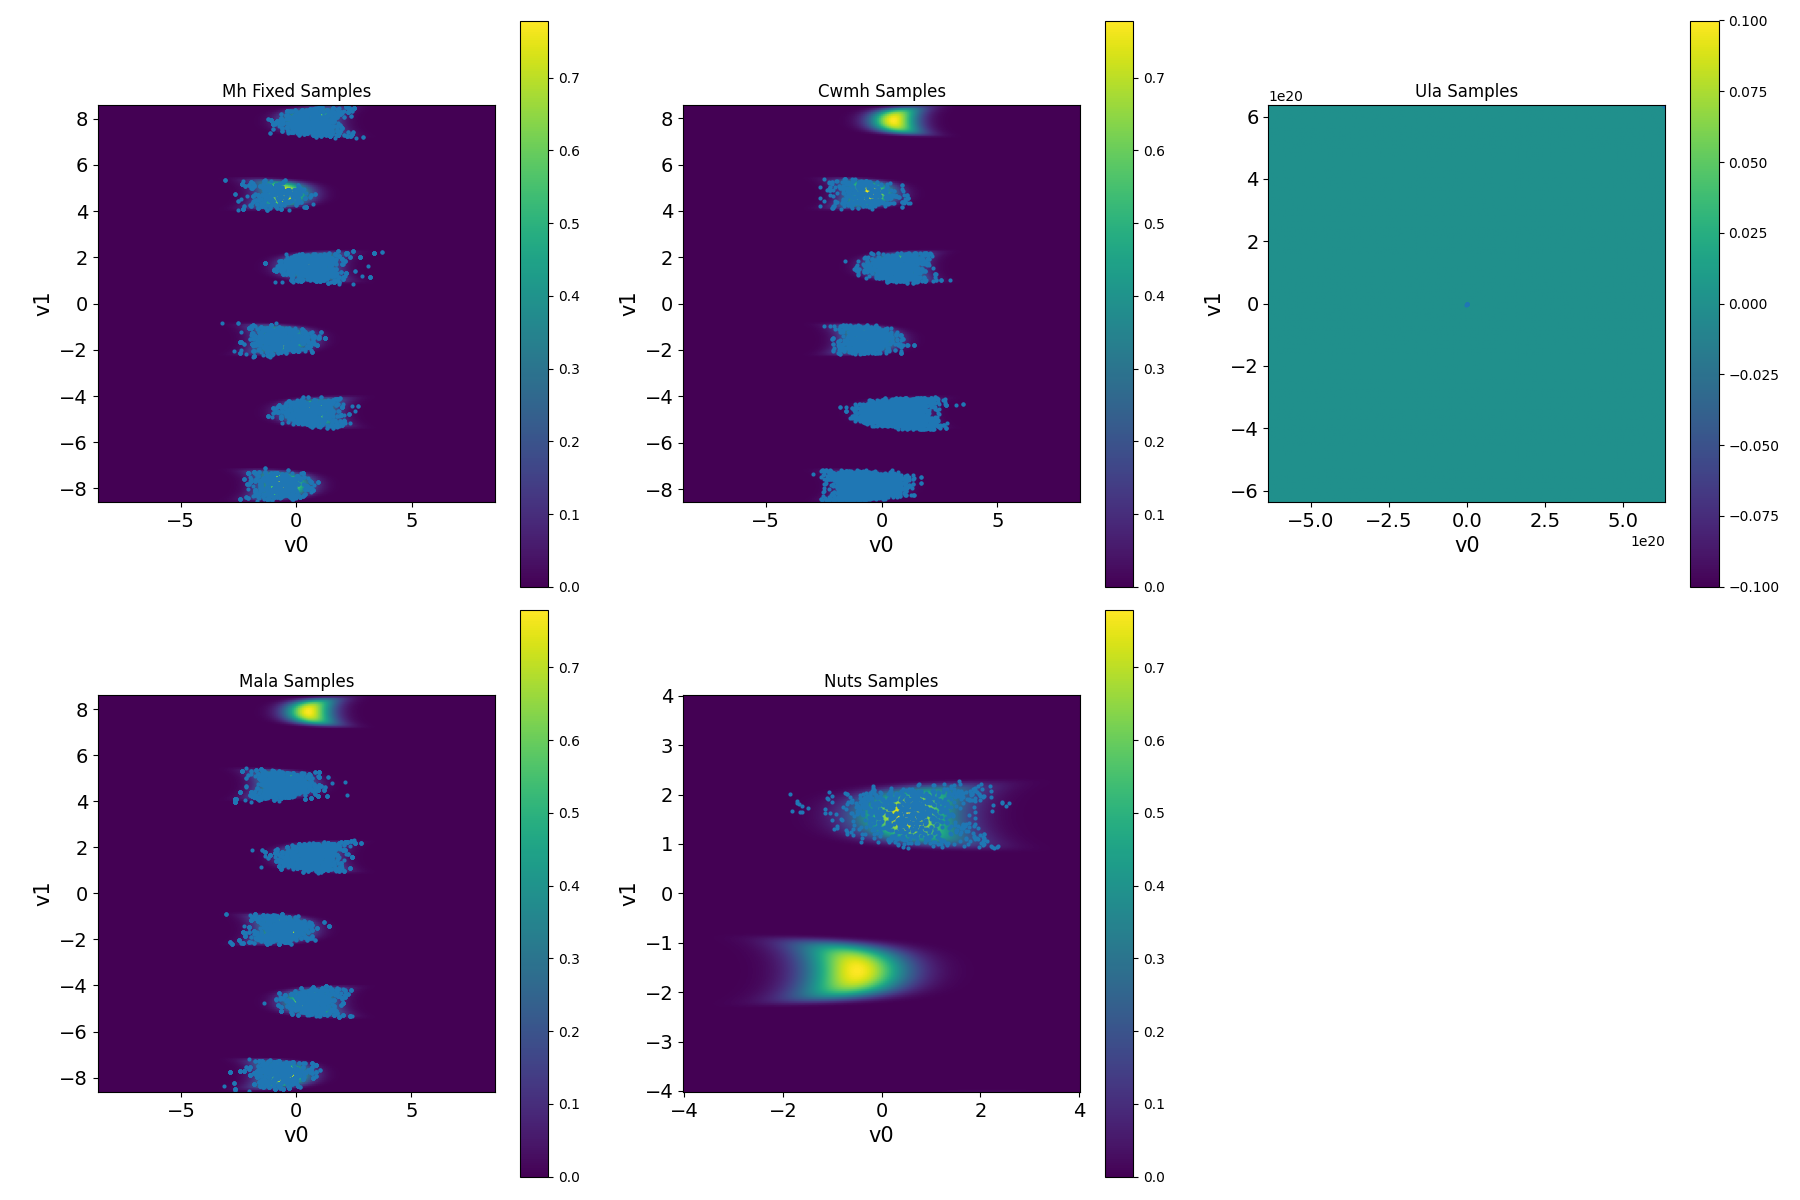

In [31]:
TA.show_plot(fig)

_Observations_
- ULA sampled from the wrong domain. 
- NUTS stuck in a local domain.